In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

file_path = "TF-IDF.xlsx"  
df = pd.read_excel(file_path)
df['text'] = (df['Title'].fillna('') + ' ' + df['Body'].fillna('')).str.strip()
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['text'])


num_topics = 10 
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(X)         
H = nmf_model.components_             
feature_names = vectorizer.get_feature_names_out()
def display_topics(H, feature_names, top_words=10):
    for topic_idx, topic in enumerate(H):
        top_features = [feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_features)}")

display_topics(H, feature_names)
df['NMF_Topic'] = W.argmax(axis=1) + 1  
df[['Title', 'NMF_Topic']].to_excel("11nmf_topic_labeled.xlsx", index=False)
print("\nexcelfile：11nmf_topic_labeled.xlsx")

Topic 1: user, usernam, authent, credenti, auth, token, chang, asset, make, client
Topic 2: certif, ssl, client, tls, ca, openssl, gener, need, server, use
Topic 3: password, use, forgot, reset, hash, protect, chang, help, sha, access
Topic 4: test, issu, salt, pr, version, valid, descript, encrypt, ad, code
Topic 5: fix, sign, memori, leak, doc, firewal, authent, hash, tag, signatur
Topic 6: key, ssh, privat, allow, host, remot, public, pkc, support, git
Topic 7: cooki, redirect, domain, valid, option, request, remov, work, protect, session
Topic 8: login, page, browser, allow, link, log, admin, instal, class, time
Topic 9: secur, updat, packag, remov, blacklist, report, prototyp, checksum, tls, mail
Topic 10: audit, add, logic, flag, request, submit, respons, mention, block, featur

excelfile：11nmf_topic_labeled.xlsx


In [4]:
category_keywords = {
    "1.1 User Identity Verification": ['user', 'username', 'authent', 'login', 'session', 'admin'],
    "1.2 Credential Validation": ['password', 'credenti', 'reset', 'forgot', 'chang', 'token'],
    "1.3 Modern Authentication Protocols": ['fido', 'oauth', 'token'],
    "2.1 Breach Detection": ['secur', 'breach', 'blacklist', 'report', 'block'],
    "2.2 Data Leak Detection": ['leak', 'protect', 'remov', 'data'],
    "3.1 Data Protection": ['hash', 'sign', 'encrypt', 'sha', 'checksum'],
    "3.2 Cryptographic Algorithms": ['symmetr', 'asymmetr', 'algorithm'],
    "3.3 Key and Certificate Management": ['certif', 'tls', 'ssl', 'key', 'ssh', 'pkc'],
    "4.1 Feature Requests": ['featur', 'submit', 'request', 'add', 'mention', 'prototyp'],
    "4.2 Improvement": ['work', 'fix', 'improv', 'tag'],
    "4.3 UI/UX Enhancements": ['page', 'browser', 'link', 'class'],
    "5.1 Build/Compile Errors": ['build', 'fail', 'compile', 'makefile'],
    "5.2 Runtime Errors": ['test', 'issu', 'crash', 'error', 'logic'],
    "5.3 Network/Protocol Errors": ['redirect', 'mail', 'respons', 'reset'],
    "6.1 Security Configuration": ['config', 'firewal', 'audit', 'flag', 'domain'],
    "6.2 System Deployment": ['instal', 'deploy', 'host', 'server', 'git', 'version'],
    "7.1 Third-party Dependencies": ['depend', 'packag', 'library'],
    "7.2 Version Compatibility": ['version', 'compat', 'update'],
    "8.1 Latency/Speed Optimization": ['latenc', 'speed', 'time'],
    "8.2 Resource Usage Optimization": ['memori', 'cpu', 'disk', 'leak']
}


In [1]:
pip install pandas numpy matplotlib seaborn wordcloud jieba

     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     --- ------------------------------------ 1.6/19.2 MB 7.3 MB/s eta 0:00:03
     -------- ------------------------------- 3.9/19.2 MB 9.6 MB/s eta 0:00:02
     ------------ --------------------------- 6.0/19.2 MB 10.0 MB/s eta 0:00:02
     ------------------ --------------------- 8.7/19.2 MB 10.5 MB/s eta 0:00:02
     ---------------------- ---------------- 11.0/19.2 MB 11.0 MB/s eta 0:00:01
     ---------------------------- ---------- 13.9/19.2 MB 11.3 MB/s eta 0:00:01
     ---------------------------------- ---- 16.8/19.2 MB 11.7 MB/s eta 0:00:01
     --------------------------------------  19.1/19.2 MB 11.7 MB/s eta 0:00:01
     --------------------------------------- 19.2/19.2 MB 11.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status '


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



分类分析结果:
1.1 User Identity Verification: 0.50
1.2 Credential Validation: 0.25
4.2 Improvement: 0.25


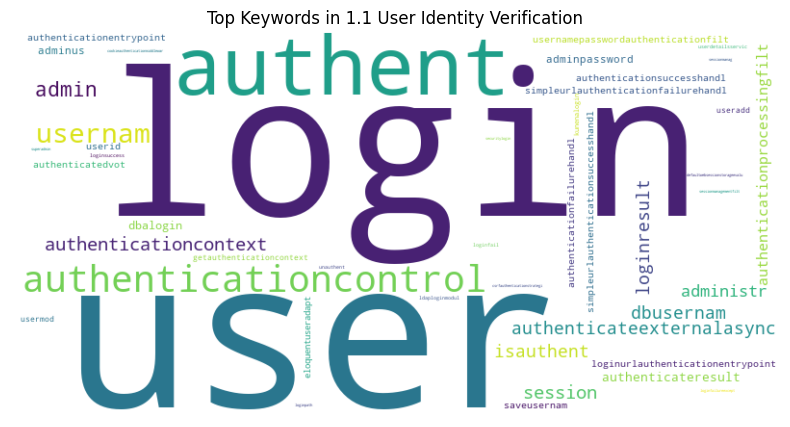

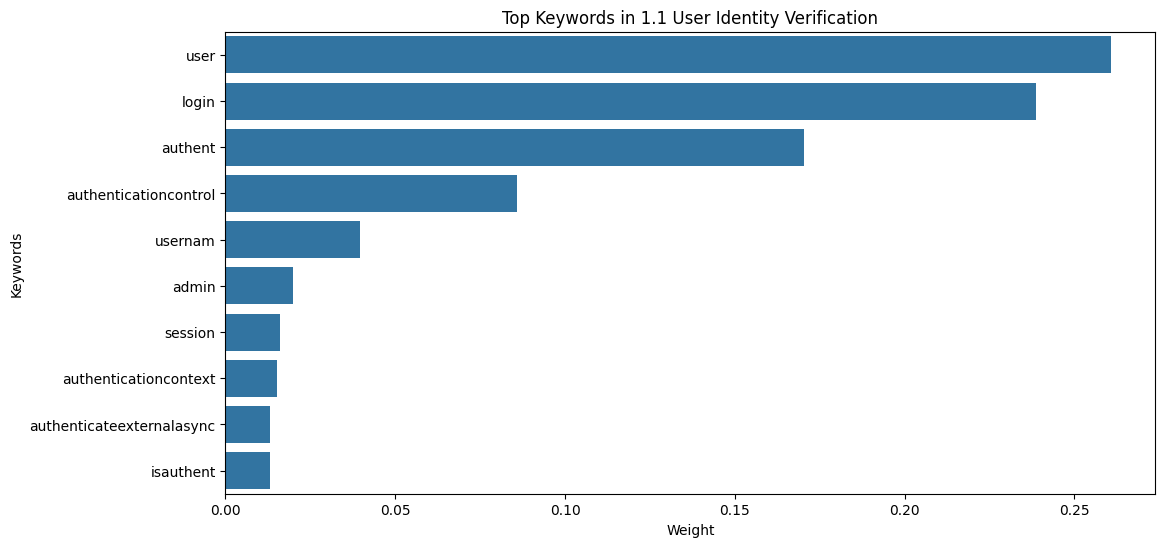

In [5]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

class SecurityCategoryAnalyzer:
    def __init__(self, excel_file):
        """
        初始化分析器
        :param excel_file: Excel文件路径
        """
        self.df = pd.read_excel(excel_file)
        self.category_keywords = {
            "1.1 User Identity Verification": ['user', 'username', 'authent', 'login', 'session', 'admin'],
            "1.2 Credential Validation": ['password', 'credenti', 'reset', 'forgot', 'chang', 'token'],
            "1.3 Modern Authentication Protocols": ['fido', 'oauth', 'token'],
            "2.1 Breach Detection": ['secur', 'breach', 'blacklist', 'report', 'block'],
            "2.2 Data Leak Detection": ['leak', 'protect', 'remov', 'data'],
            "3.1 Data Protection": ['hash', 'sign', 'encrypt', 'sha', 'checksum'],
            "3.2 Cryptographic Algorithms": ['symmetr', 'asymmetr', 'algorithm'],
            "3.3 Key and Certificate Management": ['certif', 'tls', 'ssl', 'key', 'ssh', 'pkc'],
            "4.1 Feature Requests": ['featur', 'submit', 'request', 'add', 'mention', 'prototyp'],
            "4.2 Improvement": ['work', 'fix', 'improv', 'tag'],
            "4.3 UI/UX Enhancements": ['page', 'browser', 'link', 'class'],
            "5.1 Build/Compile Errors": ['build', 'fail', 'compile', 'makefile'],
            "5.2 Runtime Errors": ['test', 'issu', 'crash', 'error', 'logic'],
            "5.3 Network/Protocol Errors": ['redirect', 'mail', 'respons', 'reset'],
            "6.1 Security Configuration": ['config', 'firewal', 'audit', 'flag', 'domain'],
            "6.2 System Deployment": ['instal', 'deploy', 'host', 'server', 'git', 'version'],
            "7.1 Third-party Dependencies": ['depend', 'packag', 'library'],
            "7.2 Version Compatibility": ['version', 'compat', 'update'],
            "8.1 Latency/Speed Optimization": ['latenc', 'speed', 'time'],
            "8.2 Resource Usage Optimization": ['memori', 'cpu', 'disk', 'leak']
        }
        self.category_weights = defaultdict(lambda: defaultdict(float))
        self.subcategory_weights = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

    def preprocess_text(self, text):
        """
        预处理文本
        :param text: 输入文本
        :return: 处理后的文本列表
        """
        # 转换为小写
        text = str(text).lower()
        # 移除特殊字符和数字
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        # 分割成单词
        words = text.split()
        # 过滤短词
        words = [word for word in words if len(word) > 2]
        return words

    def calculate_weights(self):
        """
        计算权重
        """
        # 遍历每一行数据
        for _, row in self.df.iterrows():
            text = row['text']
            words = self.preprocess_text(text)
            
            # 对每个分类计算权重
            for category, keywords in self.category_keywords.items():
                # 计算该分类关键词在文本中的出现次数
                category_score = sum(1 for word in words if any(kw in word for kw in keywords))
                
                if category_score > 0:
                    # 更新分类权重
                    for word in words:
                        if any(kw in word for kw in keywords):
                            self.category_weights[category][word] += category_score
                    
                    # 更新子分类权重
                    main_category = category.split('.')[0]
                    self.subcategory_weights[main_category][category][word] += category_score

        # 归一化权重
        self.normalize_weights()

    def normalize_weights(self):
        """
        归一化权重
        """
        # 归一化分类权重
        for category in self.category_weights:
            total = sum(self.category_weights[category].values())
            if total > 0:
                for word in self.category_weights[category]:
                    self.category_weights[category][word] /= total

        # 归一化子分类权重
        for main_category in self.subcategory_weights:
            for subcategory in self.subcategory_weights[main_category]:
                total = sum(self.subcategory_weights[main_category][subcategory].values())
                if total > 0:
                    for word in self.subcategory_weights[main_category][subcategory]:
                        self.subcategory_weights[main_category][subcategory][word] /= total

    def get_top_words(self, category, n=10):
        """
        获取指定分类的前N个关键词
        :param category: 分类名称
        :param n: 返回的关键词数量
        :return: 关键词及其权重的列表
        """
        weights = self.category_weights[category]
        return sorted(weights.items(), key=lambda x: x[1], reverse=True)[:n]

    def visualize_category(self, category):
        """
        可视化分类权重
        :param category: 分类名称
        """
        # 获取权重数据
        weights = self.category_weights[category]
        
        # 创建词云
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white'
        ).generate_from_frequencies(weights)

        # 绘制词云
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Top Keywords in {category}')
        plt.show()

        # 绘制条形图
        top_words = self.get_top_words(category)
        words, weights = zip(*top_words)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(weights), y=list(words))
        plt.title(f'Top Keywords in {category}')
        plt.xlabel('Weight')
        plt.ylabel('Keywords')
        plt.show()

    def analyze_text(self, text):
        """
        分析文本属于哪个分类
        :param text: 输入文本
        :return: 分类及其相关度分数
        """
        words = self.preprocess_text(text)
        scores = defaultdict(float)
        
        for category, keywords in self.category_keywords.items():
            score = sum(1 for word in words if any(kw in word for kw in keywords))
            if score > 0:
                scores[category] = score
        
        # 归一化分数
        total_score = sum(scores.values())
        if total_score > 0:
            scores = {k: v/total_score for k, v in scores.items()}
        
        return dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))

def main():
    # 使用示例
    analyzer = SecurityCategoryAnalyzer('dataset.xlsx')
    analyzer.calculate_weights()
    
    # 分析示例文本
    sample_text = "The user authentication system needs improvement in password validation"
    results = analyzer.analyze_text(sample_text)
    
    print("\n分类分析结果:")
    for category, score in results.items():
        print(f"{category}: {score:.2f}")
    
    # 可视化某个分类
    analyzer.visualize_category("1.1 User Identity Verification")

if __name__ == "__main__":
    main()

In [12]:
import pandas as pd
import numpy as np
from collections import defaultdict

# 定义分类关键词映射
category_keywords = {
    "1.1 User Identity Verification": ['user', 'username', 'authent', 'login', 'session', 'admin'],
    "1.2 Credential Validation": ['password', 'credenti', 'reset', 'forgot', 'chang', 'token'],
    "1.3 Modern Authentication Protocols": ['fido', 'oauth', 'token'],
    "2.1 Breach Detection": ['secur', 'breach', 'blacklist', 'report', 'block'],
    "2.2 Data Leak Detection": ['leak', 'protect', 'remov', 'data'],
    "3.1 Data Protection": ['hash', 'sign', 'encrypt', 'sha', 'checksum'],
    "3.2 Cryptographic Algorithms": ['symmetr', 'asymmetr', 'algorithm'],
    "3.3 Key and Certificate Management": ['certif', 'tls', 'ssl', 'key', 'ssh', 'pkc'],
    "4.1 Feature Requests": ['featur', 'submit', 'request', 'add', 'mention', 'prototyp'],
    "4.2 Improvement": ['work', 'fix', 'improv', 'tag'],
    "4.3 UI/UX Enhancements": ['page', 'browser', 'link', 'class'],
    "5.1 Build/Compile Errors": ['build', 'fail', 'compile', 'makefile'],
    "5.2 Runtime Errors": ['test', 'issu', 'crash', 'error', 'logic'],
    "5.3 Network/Protocol Errors": ['redirect', 'mail', 'respons', 'reset'],
    "6.1 Security Configuration": ['config', 'firewal', 'audit', 'flag', 'domain'],
    "6.2 System Deployment": ['instal', 'deploy', 'host', 'server', 'git', 'version'],
    "7.1 Third-party Dependencies": ['depend', 'packag', 'library'],
    "7.2 Version Compatibility": ['version', 'compat', 'update'],
    "8.1 Latency/Speed Optimization": ['latenc', 'speed', 'time'],
    "8.2 Resource Usage Optimization": ['memori', 'cpu', 'disk', 'leak']
}

关键词权重统计：
                                                                 mean   max  \
Category                        Subcategory                                   
Authentication Mechanisms       Credential Validation            2.34   6.0   
                                Modern Authentication Protocols  2.00   5.0   
                                User Identity Verification       3.43  24.0   
Compatibility & Dependencies    Third-party Dependencies         2.00   2.0   
Configuration & Management      Security Configuration           1.87   6.0   
                                System Deployment                1.89   3.0   
Cryptography                    Cryptographic Algorithms         2.00   2.0   
                                Data Protection                  2.96  14.0   
                                Key and Certificate Management   2.43  11.0   
Error & Exception Handling      Build/Compile Errors             1.20   2.0   
                                Network/Pro

C:\Users\10621\AppData\Local\Temp\ipykernel_27408\1295874108.py:122: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10621\AppData\Local\Temp\ipykernel_27408\1295874108.py:122: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10621\AppData\Local\Temp\ipykernel_27408\1295874108.py:122: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10621\AppData\Local\Temp\ipykernel_27408\1295874108.py:122: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10621\AppData\Local\Temp\ipykernel_27408\1295874108.py:122: UserWarning: Glyph 38190 (\N{CJK UNIFIED IDEOGRAPH-952E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10621\AppData\Local\Temp\ipykernel_27408\1295874108.py:122: UserWarning: Glyph 35

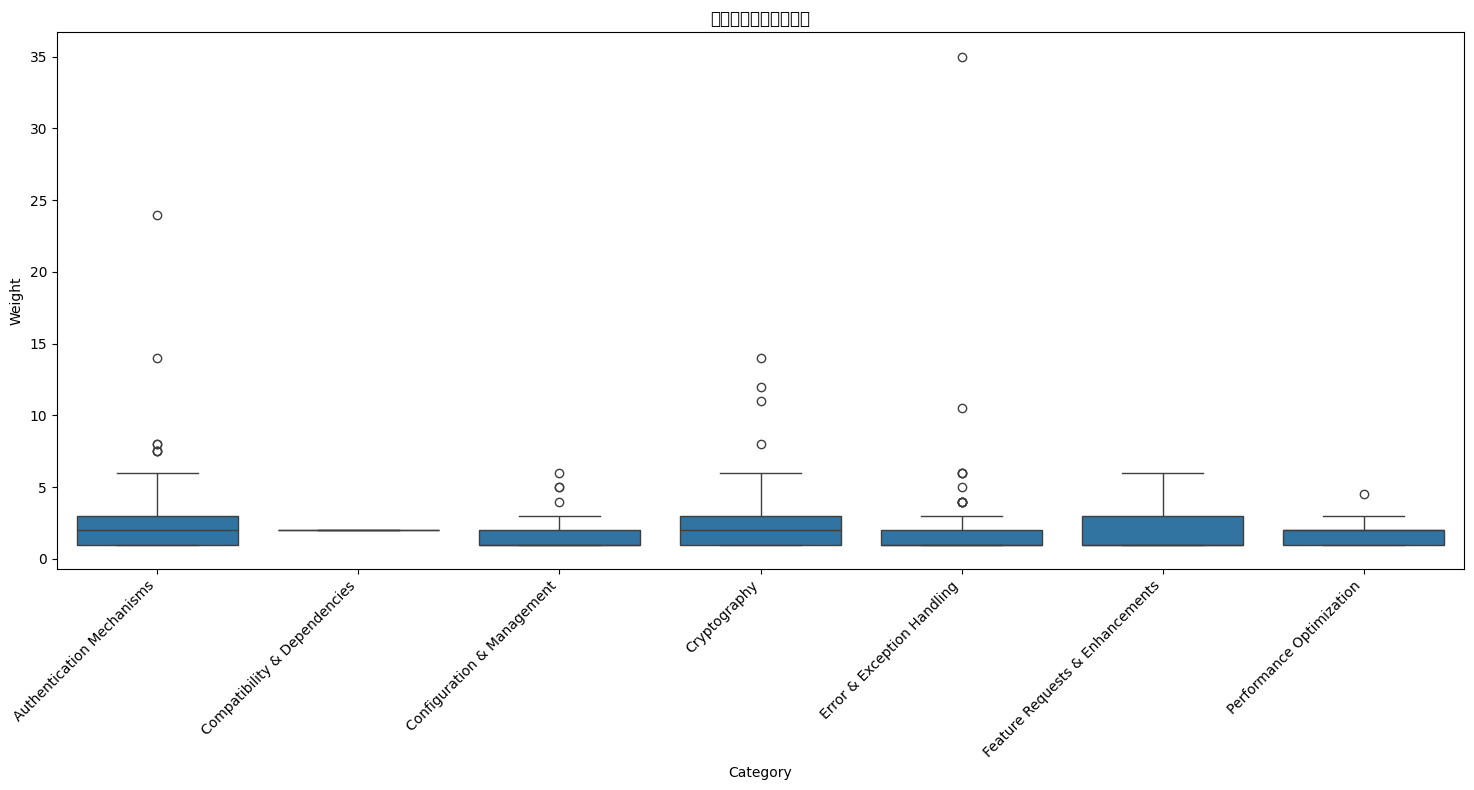

In [16]:
import pandas as pd
import numpy as np
from collections import defaultdict

# 定义分类关键词映射
category_keywords = {
    "Authentication Mechanisms": {
        "User Identity Verification": ['user', 'username', 'authent', 'login', 'session', 'admin'],
        "Credential Validation": ['password', 'credenti', 'reset', 'forgot', 'chang', 'token'],
        "Modern Authentication Protocols": ['fido', 'oauth', 'token']
    },
    "Breach detection": {  # 修改为与Excel文件匹配的大小写
        "Breach Detection": ['secur', 'breach', 'blacklist', 'report', 'block'],
        "Data Leak Detection": ['leak', 'protect', 'remov', 'data']
    },
    "Cryptography": {
        "Data Protection": ['hash', 'sign', 'encrypt', 'sha', 'checksum'],
        "Cryptographic Algorithms": ['symmetr', 'asymmetr', 'algorithm'],
        "Key and Certificate Management": ['certif', 'tls', 'ssl', 'key', 'ssh', 'pkc']
    },
    "Feature Requests & Enhancements": {
        "Feature Requests": ['featur', 'submit', 'request', 'add', 'mention', 'prototyp'],
        "Improvement": ['work', 'fix', 'improv', 'tag'],
        "UI/UX Enhancements": ['page', 'browser', 'link', 'class']
    },
    "Error & Exception Handling": {
        "Build/Compile Errors": ['build', 'fail', 'compile', 'makefile'],
        "Runtime Errors": ['test', 'issu', 'crash', 'error', 'logic'],
        "Network/Protocol Errors": ['redirect', 'mail', 'respons', 'reset']
    },
    "Configuration & Management": {
        "Security Configuration": ['config', 'firewal', 'audit', 'flag', 'domain'],
        "System Deployment": ['instal', 'deploy', 'host', 'server', 'git', 'version']
    },
    "Compatibility & Dependencies": {
        "Third-party Dependencies": ['depend', 'packag', 'library'],
        "Version Compatibility": ['version', 'compat', 'update']
    },
    "Performance Optimization": {
        "Latency/Speed Optimization": ['latenc', 'speed', 'time'],
        "Resource Usage Optimization": ['memori', 'cpu', 'disk', 'leak']
    }
}

# 读取数据集
df = pd.read_excel('dataset.xlsx')

# 创建关键词到分类的映射
keyword_to_category = defaultdict(list)
for main_category, subcategories in category_keywords.items():
    for subcategory, keywords in subcategories.items():
        for keyword in keywords:
            keyword_to_category[keyword].append((main_category, subcategory))

# 计算每个关键词在每个分类中的权重
def calculate_keyword_weights(text, main_category, subcategory):
    weights = {}
    text = text.lower()
    
    try:
        # 获取该分类的关键词
        category_keywords_list = category_keywords[main_category][subcategory]
        
        # 计算每个关键词的权重
        for keyword in category_keywords_list:
            if keyword in text:
                # 计算关键词在文本中出现的次数
                count = text.count(keyword)
                # 计算关键词在文本中的位置权重（越靠前权重越高）
                position_weight = 1.0
                if text.startswith(keyword):
                    position_weight = 1.5
                # 计算最终权重
                weights[keyword] = count * position_weight
    except KeyError:
        print(f"Warning: Category '{main_category}' or subcategory '{subcategory}' not found in mapping")
        return {}
    
    return weights

# 为每个文本计算权重
results = []
for _, row in df.iterrows():
    text = row['text']
    main_category = row['Category']
    subcategory = row['Subcategory']
    
    # 计算权重
    weights = calculate_keyword_weights(text, main_category, subcategory)
    
    # 将结果添加到列表中
    for keyword, weight in weights.items():
        results.append({
            'Category': main_category,
            'Subcategory': subcategory,
            'Keyword': keyword,
            'Weight': weight,
            'Text': text
        })

# 创建结果DataFrame
results_df = pd.DataFrame(results)

# 按分类和权重排序
results_df = results_df.sort_values(['Category', 'Subcategory', 'Weight'], ascending=[True, True, False])

# 保存结果到Excel文件
results_df.to_excel('keyword_weights_results.xlsx', index=False)

# 显示结果统计
print("关键词权重统计：")
print(results_df.groupby(['Category', 'Subcategory'])['Weight'].agg(['mean', 'max', 'count']).round(2))

# 可视化每个分类的关键词权重分布
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=results_df, x='Category', y='Weight')
plt.xticks(rotation=45, ha='right')
plt.title('各分类关键词权重分布')
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import numpy as np
from collections import defaultdict

# 定义分类关键词映射
category_keywords = {
    "Authentication Mechanisms": {
        "User Identity Verification": ['user', 'username', 'authent', 'login', 'session', 'admin'],
        "Credential Validation": ['password', 'credenti', 'reset', 'forgot', 'chang', 'token'],
        "Modern Authentication Protocols": ['fido', 'oauth', 'token']
    },
    "Breach detection": {
        "Breach Detection": ['secur', 'breach', 'blacklist', 'report', 'block'],
        "Data Leak Detection": ['leak', 'protect', 'remov', 'data']
    },
    "Cryptography": {
        "Data Protection": ['hash', 'sign', 'encrypt', 'sha', 'checksum'],
        "Cryptographic Algorithms": ['symmetr', 'asymmetr', 'algorithm'],
        "Key and Certificate Management": ['certif', 'tls', 'ssl', 'key', 'ssh', 'pkc']
    },
    "Feature Requests & Enhancements": {
        "Feature Requests": ['featur', 'submit', 'request', 'add', 'mention', 'prototyp'],
        "Improvement": ['work', 'fix', 'improv', 'tag'],
        "UI/UX Enhancements": ['page', 'browser', 'link', 'class']
    },
    "Error & Exception Handling": {
        "Build/Compile Errors": ['build', 'fail', 'compile', 'makefile'],
        "Runtime Errors": ['test', 'issu', 'crash', 'error', 'logic'],
        "Network/Protocol Errors": ['redirect', 'mail', 'respons', 'reset']
    },
    "Configuration & Management": {
        "Security Configuration": ['config', 'firewal', 'audit', 'flag', 'domain'],
        "System Deployment": ['instal', 'deploy', 'host', 'server', 'git', 'version']
    },
    "Compatibility & Dependencies": {
        "Third-party Dependencies": ['depend', 'packag', 'library'],
        "Version Compatibility": ['version', 'compat', 'update']
    },
    "Performance Optimization": {
        "Latency/Speed Optimization": ['latenc', 'speed', 'time'],
        "Resource Usage Optimization": ['memori', 'cpu', 'disk', 'leak']
    }
}

# 读取数据集
df = pd.read_excel('dataset.xlsx')

# 创建关键词权重字典
keyword_weights = defaultdict(lambda: defaultdict(float))

# 计算每个关键词在每个分类中的权重
for _, row in df.iterrows():
    text = row['text'].lower()
    main_category = row['Category']
    subcategory = row['Subcategory']
    
    # 获取该分类的关键词
    try:
        keywords = category_keywords[main_category][subcategory]
        
        # 计算每个关键词的权重
        for keyword in keywords:
            if keyword in text:
                # 计算关键词在文本中出现的次数
                count = text.count(keyword)
                # 计算关键词在文本中的位置权重（越靠前权重越高）
                position_weight = 1.0
                if text.startswith(keyword):
                    position_weight = 1.5
                # 累加权重
                keyword_weights[main_category][keyword] += count * position_weight
    except KeyError:
        continue

# 创建结果DataFrame
results = []
for main_category, keywords in keyword_weights.items():
    for keyword, weight in keywords.items():
        results.append({
            'Category': main_category,
            'Keyword': keyword,
            'Weight': weight
        })

# 创建DataFrame并排序
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(['Category', 'Weight'], ascending=[True, False])

# 保存结果到Excel文件
results_df.to_excel('keyword_weights.xlsx', index=False)

# 显示结果
print(results_df.to_string(index=False))

                       Category   Keyword  Weight
      Authentication Mechanisms   authent    69.0
      Authentication Mechanisms     login    65.0
      Authentication Mechanisms  password    46.0
      Authentication Mechanisms      user    43.5
      Authentication Mechanisms  credenti    16.0
      Authentication Mechanisms     token    15.0
      Authentication Mechanisms     chang    14.0
      Authentication Mechanisms     oauth    10.0
      Authentication Mechanisms     reset     6.0
      Authentication Mechanisms      fido     5.0
      Authentication Mechanisms    forgot     4.0
      Authentication Mechanisms   session     1.0
   Compatibility & Dependencies    depend     4.0
     Configuration & Management    config    28.0
     Configuration & Management     audit    14.0
     Configuration & Management    domain     6.0
     Configuration & Management   firewal     6.0
     Configuration & Management      host     6.0
     Configuration & Management   version     4.0


In [20]:
                 Category   Keyword  Weight
     1.1 User Identity Verification      user    43.5
     1.1 User Identity Verification   authent    69.0
     1.1 User Identity Verification     login    65.0
     1.1 User Identity Verification   session     1.0
     1.2 Credential Validation    password    46.0
     1.2 Credential Validation   credenti    16.0
     1.2 Credential Validation     token    15.0
     1.2 Credential Validation     chang    14.0
     1.2 Credential Validation     reset     6.0
     1.2 Credential Validation    forgot     4.0
     1.3 Modern Authentication Protocols     oauth    10.0
     1.3 Modern Authentication Protocols      fido     5.0
     1.3 Modern Authentication Protocols     token    15.0
     6.1 Security Configuration    config    28.0
     6.1 Security Configuration     audit    14.0
     6.1 Security Configuration    domain     6.0
     6.1 Security Configuration   firewal     6.0
     6.1 Security Configuration      flag     2.0
     6.2 System Deployment      host     6.0
     6.2 System Deployment   version     4.0
     6.2 System Deployment    instal     3.0
     6.2 System Deployment    server     3.0
     6.2 System Deployment    deploy     1.0
     3.1 Data Protection    certif    66.0
     3.1 Data Protection   encrypt    48.0
     3.1 Data Protection      hash    29.0
     3.1 Data Protection      sign    21.0
     3.1 Data Protection       sha     9.0
     3.1 Data Protection  checksum     2.5
     3.2 Cryptographic Algorithms       key    38.0
     3.2 Cryptographic Algorithms       ssl    38.0
     3.2 Cryptographic Algorithms       tls    32.5
     3.2 Cryptographic Algorithms       pkc     8.0
     3.2 Cryptographic Algorithms algorithm     2.0
     5.1 Build/Compile Errors     build     2.0
     5.2 Runtime Errors      test    95.5
     5.2 Runtime Errors     error    52.5
     5.2 Runtime Errors      issu    47.0
     5.2 Runtime Errors     crash     4.0
     5.2 Runtime Errors     logic     1.0
     5.3 Network/Protocol Errors      fail     4.0
     5.3 Network/Protocol Errors   respons     2.0
     5.3 Network/Protocol Errors  redirect     1.0
     4.1 Feature Requests       add    51.5
     4.1 Feature Requests    featur    25.5
     4.1 Feature Requests   request    18.5
     4.1 Feature Requests    submit     6.0
     4.1 Feature Requests   mention     4.0
     4.2 Improvement       fix     7.0
     4.2 Improvement      work     5.0
     7.1 Third-party Dependencies    depend     4.0
     8.1 Latency/Speed Optimization      time     2.0
     8.1 Latency/Speed Optimization     speed     1.0
     8.2 Resource Usage Optimization    memori    12.5
     8.2 Resource Usage Optimization      leak     8.0

IndentationError: unexpected indent (1187781115.py, line 1)

In [25]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# 读取原始数据集
df_original = pd.read_excel('dataset.xlsx')  # 包含原始文本和分类
df_weights = pd.read_excel('keyword_weights.xlsx')  # 包含关键词权重

# 创建特征矩阵
def create_feature_matrix(text, keyword_weights):
    features = np.zeros(len(keyword_weights))
    text = text.lower()
    
    for i, (keyword, _) in enumerate(keyword_weights.items()):
        if keyword in text:
            features[i] = 1
    
    return features

# 准备训练数据
X = []  # 特征矩阵
y = []  # 标签

# 获取所有唯一的关键词
all_keywords = df_weights['Keyword'].unique()
keyword_to_index = {keyword: i for i, keyword in enumerate(all_keywords)}

# 为每个文本创建特征向量
for _, row in df_original.iterrows():
    text = row['text']  # 使用正确的列名
    category = row['Category'] + ' ' + row['Subcategory']  # 组合主分类和子分类
    
    # 创建特征向量
    features = np.zeros(len(all_keywords))
    for keyword in text.lower().split():
        if keyword in keyword_to_index:
            features[keyword_to_index[keyword]] = 1
    
    X.append(features)
    y.append(category)

# 转换为numpy数组
X = np.array(X)
y = np.array(y)

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 训练SVM模型
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# 评估模型
y_pred = svm.predict(X_test)
print("分类报告：")
print(classification_report(y_test, y_pred))

# 保存模型和scaler
joblib.dump(svm, 'svm_classifier.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(keyword_to_index, 'keyword_to_index.joblib')

# 测试新文本
def predict_category(text):
    # 加载模型和scaler
    svm = joblib.load('svm_classifier.joblib')
    scaler = joblib.load('scaler.joblib')
    keyword_to_index = joblib.load('keyword_to_index.joblib')
    
    # 创建特征向量
    features = np.zeros(len(keyword_to_index))
    for keyword in text.lower().split():
        if keyword in keyword_to_index:
            features[keyword_to_index[keyword]] = 1
    
    # 标准化特征
    features_scaled = scaler.transform(features.reshape(1, -1))
    
    # 预测
    prediction = svm.predict(features_scaled)
    probabilities = svm.predict_proba(features_scaled)
    
    return prediction[0], probabilities[0]

# 测试示例
test_text = "This is a test text about authentication and login"
category, probabilities = predict_category(test_text)
print(f"\n测试文本: {test_text}")
print(f"预测分类: {category}")
print(f"分类概率: {probabilities}")

# 显示每个类别的预测概率
classes = svm.classes_
for i, prob in enumerate(probabilities):
    print(f"{classes[i]}: {prob:.2f}")

分类报告：
                                                           precision    recall  f1-score   support

                       Anomaly detection Breach Detection       0.00      0.00      0.00         3
                       Anomaly detection Breach detection       0.00      0.00      0.00         1
                    Anomaly detection Data Leak Detection       0.25      0.33      0.29         3
          Authentication Mechanisms Credential Validation       0.67      0.33      0.44         6
Authentication Mechanisms Modern Authentication Protocols       0.33      0.50      0.40         2
     Authentication Mechanisms User Identity Verification       0.83      0.71      0.77         7
    Compatibility & Dependencies Third-party Dependencies       0.00      0.00      0.00         1
        Configuration & Management Security Configuration       0.14      0.20      0.17         5
             Configuration & Management System Deployment       0.00      0.00      0.00         2
   

C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMet

In [ ]:
import pandas as pd
import numpy as np
import joblib

def test_classifier(text):
    """
    测试分类器对新文本的分类
    """
    # 加载模型和scaler
    svm = joblib.load('svm_classifier.joblib')
    scaler = joblib.load('scaler.joblib')
    keyword_to_index = joblib.load('keyword_to_index.joblib')
    
    # 创建特征向量
    features = np.zeros(len(keyword_to_index))
    for keyword in text.lower().split():
        if keyword in keyword_to_index:
            features[keyword_to_index[keyword]] = 1
    
    # 标准化特征
    features_scaled = scaler.transform(features.reshape(1, -1))
    
    # 预测
    prediction = svm.predict(features_scaled)
    probabilities = svm.predict_proba(features_scaled)
    
    # 获取所有类别的概率
    classes = svm.classes_
    class_probs = [(classes[i], prob) for i, prob in enumerate(probabilities[0])]
    # 按概率降序排序
    class_probs.sort(key=lambda x: x[1], reverse=True)
    
    # 打印结果
    print(f"\n输入文本: {text}")
    print(f"\n预测分类: {prediction[0]}")
    print("\n所有类别的概率:")
    for category, prob in class_probs:
        print(f"{category}: {prob:.2%}")

# 测试示例
test_cases = [
    "The user authentication system needs to be improved for better security",
    "We found a memory leak in the application that needs to be fixed",
    "The SSL certificate needs to be updated for the server",
    "There is a build error in the latest version",
    "We need to add new features to the user interface",
    "The system is experiencing high CPU usage",
    "The password reset functionality is not working properly",
    "We need to update the dependencies to fix compatibility issues"
]

print("开始测试分类器...")
for test_text in test_cases:
    test_classifier(test_text)
    print("\n" + "="*50 + "\n")

# 交互式测试
while True:
    user_input = input("\n请输入要分类的文本（输入'q'退出）: ")
    if user_input.lower() == 'q':
        break
    test_classifier(user_input)

开始测试分类器...

输入文本: The user authentication system needs to be improved for better security

预测分类: Feature Requests & Enhancements Feature Requests

所有类别的概率:
Feature Requests & Enhancements Feature Requests: 20.15%
Error & Exception Handling Runtime Errors: 19.21%
Configuration & Management Security Configuration: 10.11%
Anomaly detection Breach Detection: 7.80%
Authentication Mechanisms User Identity Verification: 6.93%
Cryptography Data Protection: 6.45%
Authentication Mechanisms Credential Validation: 6.20%
Anomaly detection Data Leak Detection: 4.60%
Cryptography Key and Certificate Management: 3.95%
Feature Requests & Enhancements Improvement: 1.96%
Authentication Mechanisms Modern Authentication Protocols: 1.75%
Performance Optimization Resource Usage Optimization: 1.59%
Configuration & Management System Deployment: 1.56%
Anomaly detection Breach detection: 1.44%
Error & Exception Handling Network/Protocol Errors: 1.33%
Error & Exception Handling Build/Compile Errors: 1.23%
Perform


请输入要分类的文本（输入'q'退出）:  "The user authentication system needs to be improved for better security",     "We found a memory leak in the application that needs to be fixed",     "The SSL certificate needs to be updated for the server",     "There is a build error in the latest version",     "We need to add new features to the user interface",     "The system is experiencing high CPU usage",     "The password reset functionality is not working properly",     "We need to update the dependencies to fix compatibility issues"



输入文本: "The user authentication system needs to be improved for better security",     "We found a memory leak in the application that needs to be fixed",     "The SSL certificate needs to be updated for the server",     "There is a build error in the latest version",     "We need to add new features to the user interface",     "The system is experiencing high CPU usage",     "The password reset functionality is not working properly",     "We need to update the dependencies to fix compatibility issues"

预测分类: Error & Exception Handling Runtime Errors

所有类别的概率:
Error & Exception Handling Runtime Errors: 56.13%
Configuration & Management Security Configuration: 10.30%
Authentication Mechanisms Credential Validation: 4.93%
Performance Optimization Resource Usage Optimization: 3.86%
Authentication Mechanisms User Identity Verification: 3.43%
Anomaly detection Breach Detection: 2.50%
Feature Requests & Enhancements Feature Requests: 2.33%
Cryptography Data Protection: 2.08%
Feature Requests 